<a href="https://colab.research.google.com/github/Eyabennessib/Machine-Learning/blob/main/TP6_R%C3%A9seau_de_neurones_convolutifs_pour_la_classification_binaire_des_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TP6_Réseau_de_neurones_convolutifs_pour_la_classification_binaire_des_images**

Ce TP s’intéresse à la classification d’images cellulaires en deux classes : image d’une cellule infectée 
ou image d’une cellule non infectée.

# A) Augmentation de la taille du jeu de données d’entrainement 


In [ ]:
from keras.preprocessing.image import ImageDataGenerator 
from skimage import io 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
datagen = ImageDataGenerator(rotation_range = 45, # Plage de degrés pour les rotations aléatoires.
                            width_shift_range =0.2, # Décalage de l'image de l'axe X de 20%
                            height_shift_range =0.2, # Décalage de l'image de l'axe y de 20%
                            shear_range = 0.2, # Intensité de cisaillement 
                            #(angle de cisaillement dans le sens inverse des aiguilles d’une montre en degrés)
                            horizontal_flip = True, #Retourner les entrées de manière aléatoire horizontalement.
                            zoom_range=0.2, # Plage pour zoom aléatoire
                            cval = 125, # Utilisée pour les points situés en dehors des limites lorsque . fill_mode = "constant"
                            fill_mode = 'constant') # Les points en dehors des limites de l'entrée sont remplis selon le mode donné :'constant': 
                            # kkkkkkkk|abcd|kkkkkkkk (cval=k)

In [ ]:
x =io.imread('monalisa.jpg') 
x = x.reshape((1,) + x.shape) 

On ajoute une dimension de taille [1] à la matrice de l'image pour pouvoir utiliser datagen
x.shape 

In [ ]:
!mkdir augmented

In [ ]:
i = 0
for batch in datagen.flow(x, batch_size=16, # Taille de lot de données
                          save_to_dir='augmented', #sauvgarder dans le répertoire augmented 
                          save_prefix='aug', #enregistrer le préfixe du nom de chaque image "aug"
                          save_format='png'): #format des images
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

**Fill_mode ="NEAREST"**

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=45,     
        width_shift_range=0.2,  
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest') 


i = 0
for batch in datagen.flow(x,
                          batch_size=16,          
                          save_to_dir='augmented',
                          save_prefix='nearest',      
                          save_format='png'):     
    i += 1
    if i > 20:
        break  

**Fill_mode ="REFLECT"**

In [ ]:
datagen = ImageDataGenerator(rotation_range=45, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True, 
                             fill_mode='reflect') 

i = 0
for batch in datagen.flow(x,
                          batch_size=16,          
                          save_to_dir='augmented',
                          save_prefix='reflect',      
                          save_format='png'): 
    i += 1
    if i > 20:
        break 

**Fill_mode ="WRAP"**

In [ ]:
datagen = ImageDataGenerator(rotation_range=45, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True, 
                             fill_mode='wrap') 

i = 0
for batch in datagen.flow(x,
                          batch_size=16,          
                          save_to_dir='augmented',
                          save_prefix='wrap',      
                          save_format='png'): 
    i += 1
    if i > 20:
        break 

- **constant** : remplir la zone vide par un couleur en donnant une valeur à cval.  
- **nearest**  : remplir la zone avec le pixel le plus proche. 
- **reflect**  : remplir la zone avec les mêmes pixels du contours de l'image (effet mirroir)  
- **wrap**     : remplir la zone en effectuant une rotation des pixels autours de l'image.

# B) Classification binaire (infectée, non-infectée) d’images cellulaires 

### Exercice 1 : Lecture et labellisation du jeu de données 

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization 
from keras.layers import Activation, Dropout, Flatten, Dense 
import os 
import cv2 
from PIL import Image 
import numpy as np

In [ ]:
image_directory = 'cell_images/'

In [ ]:
SIZE = 150  #on définit la taille 150 de l'image
dataset = [] #liste des features (x)
label = [] #liste des labels(y)
parasitized_images = os.listdir(image_directory + 'Parasitized/') #lister les images dans le répertoire Parasitized
for i, image_name in enumerate(parasitized_images) : # enumeration du dossier
    if (image_name.split('.')[1] == 'png') :  #comparer le format de l'image avec le format png
        image= cv2.imread(image_directory + 'Parasitized/' +image_name) #lire l'image
        image = Image.fromarray(image,'RGB')  #Crée une mémoire d’image à partir d’un objet exportant l’interface de tableau
       # le mode RGB est utilisé pour modifier la façon dont les données sont lues
        image = image.resize((SIZE,SIZE))  ##définir la taille de l'image(150,150)
        dataset.append(np.array(image))  #remplir la liste dataset 
        label.append(1) # le label à 1 pour les images "Parasitized"

In [ ]:
SIZE = 150 
dataset = [] 
label = [] 
uninfected_images = os.listdir('Uninfected/') 
for i, image_name in enumerate(uninfected_images) : 
   if (image_name.split('.')[1] == 'png') : 
       image= cv2.imread(image_directory + 'Uninfected/' +image_name) 
       image = Image.fromarray(image,'RGB') 
       image = image.resize((SIZE,SIZE)) 
       dataset.append(np.array(image)) 
       label.append(0) #remplir la liste label par 0
     

In [ ]:
dataset = np.array(dataset) 
label = np.array(label) 

In [ ]:
print(dataset.shape)
print(label.shape)

(27558, 150, 150, 3)
(27558,)


« Label de cette image : » 0


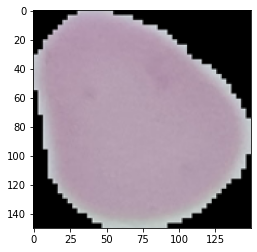

In [ ]:
import random 
import numpy as np 
image_number =random.randint(0,len(dataset)-1) 
plt.imshow(np.reshape(dataset[image_number],[150,150,3])) 
print('« Label de cette image : »', label[image_number]) 

### Exercice 2 : Construction et entrainement du modèle 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size =0.20, random_state =0) 

In [ ]:
X_train = X_train/255. 
X_test = X_test/255.

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [ ]:
INPUT_SHAPE =(SIZE, SIZE, 3) # la taille des données d'entrées (150,150,3) 
model = Sequential() # choisir le modèle séquentiel
model.add(Conv2D(32,(3,3),input_shape = INPUT_SHAPE)) # couche d'entrée : couche de convolutionn 2D avec 32 neurones de taille (3,3)
model.add(Activation('relu')) # fonction d'activation relu pour la couche d'entrée
model.add(MaxPooling2D(pool_size=(2,2))) # sous couche Maxpooling est pour réduire les dimensions spatiales du volume de sortie
model.add(Conv2D(32,(3,3), kernel_initializer = 'he_uniform')) # sous couche de convolutionn 2D avec 32 neurones de taille (3,3)
# Les initialiseurs définissent la manière de définir les poids aléatoires initiaux des couches.
model.add(Activation('relu')) # sous couche d'activation relu pour la couche précédente
model.add(MaxPooling2D(pool_size=(2,2))) # sous couche Maxpooling est pour réduire les dimensions spatiales du volume de sortie
model.add(Conv2D(64,(3,3), kernel_initializer = 'he_uniform')) # sous couche de convolutionn 2D avec 64 neurones de taille (3,3)
model.add(Activation('relu')) #sous couche d'activation relu pour la couche précédente
model.add(MaxPooling2D(pool_size=(2,2))) # sous couche Maxpooling est pour réduire les dimensions spatiales du volume de sortie
model.add(Flatten()) #sous couche flatten 
#role : l'opération Flatten sur le tenseur remodèle 
#le tenseur pour qu'il ait la forme qui est égale au nombre d'éléments contenus dans le tenseur sans inclure la dimension du lot.
model.add(Dense(64)) # sous couche Dense avec 64 neurones 
model.add(Activation('relu')) #sous couche d'activation relu pour la couche précédente
model.add(Dropout(0.5)) # sous dropout placée entre la dernière sous couche et la couche de sortie avec un rate de 50%
# role | une technique où des neurones sélectionnés au hasard sont ignorés pendant l'entraînement. Ils sont "abandonnés" au hasard.
# c'est utilisé pour améliorer la performance du modèle et éviter le overfitting
model.add(Dense(1)) #couche de sortie avec un seul neurone
model.add(Activation('sigmoid')) # fonction d'activation sigmoid de la couche de sortie 

In [ ]:
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy']) 

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                  

In [ ]:
History = model.fit(X_train, y_train, batch_size=64, verbose = 1 ,epochs =20, validation_data =(X_test, y_test), shuffle = False) 

Epoch 1/20
345/345 [==============================] - 227s 654ms/step - loss: 0.5296 - accuracy: 0.7364 - val_loss: 0.2036 - val_accuracy: 0.9352
Epoch 2/20
345/345 [==============================] - 233s 675ms/step - loss: 0.2122 - accuracy: 0.9335 - val_loss: 0.1858 - val_accuracy: 0.9380
Epoch 3/20
345/345 [==============================] - 313s 908ms/step - loss: 0.1713 - accuracy: 0.9483 - val_loss: 0.1722 - val_accuracy: 0.9448
Epoch 4/20
345/345 [==============================] - 194s 562ms/step - loss: 0.1561 - accuracy: 0.9512 - val_loss: 0.1759 - val_accuracy: 0.9443
Epoch 5/20
345/345 [==============================] - 272s 789ms/step - loss: 0.1535 - accuracy: 0.9542 - val_loss: 0.1528 - val_accuracy: 0.9557
Epoch 6/20
345/345 [==============================] - 335s 972ms/step - loss: 0.1466 - accuracy: 0.9564 - val_loss: 0.1594 - val_accuracy: 0.9468
Epoch 7/20
345/345 [==============================] - 294s 850ms/step - loss: 0.1504 - accuracy: 0.9535 - val_loss: 0.1573 -

### Exercice 3 : Analyse des performances du modèle 

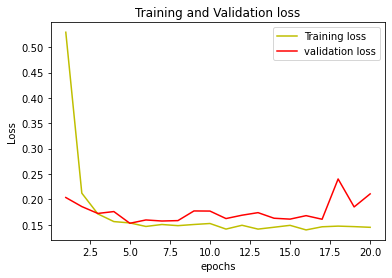

In [ ]:
loss = History.history['loss']
val_loss = History.history['val_loss'] 
epochs = range(1,len(loss)+1) 
plt.plot(epochs,loss,'y', label ='Training loss')
plt.plot(epochs,val_loss,'r', label ='validation loss') 
plt.title ('Training and Validation loss') 
plt.xlabel('epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()

Nous pouvons voir que le modèle est bien formé en fonction des courbes affichées sur le graphique.
Pour 20 époques, la fonction Training loss est une fonction linéaire qui est basée sur l'entraînement des données "d'apprentissage" et tend vers 0 pour se stabiliser à 0,15 sur 20 épochs.
De plus, la fonction validation loss est basée sur l'apprentissage des données de "validation" ainsi que le réglage des hyperparamètres et la sélection du modèle et conserve une valeur loss moins de 0,25. 
Cela indique que la prédiction de l'étiquette est correcte avec un modèle bien formé.

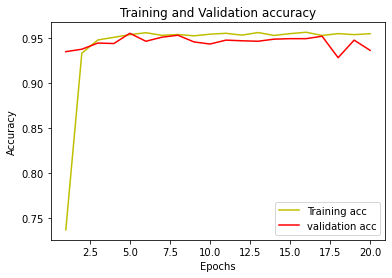

In [ ]:
acc = History.history['accuracy'] 
val_acc = History.history['val_accuracy'] 
plt.plot(epochs,acc,'y', label ='Training acc') 
plt.plot(epochs,val_acc,'r', label ='validation acc') 
plt.title ('Training and Validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.show() 

la fonction accuracy est le contraire de la fonction loss. On peut vérifier avec le graphique que le nombre de points de données y (les labels) sont correctement prédits sur tous les points de données des features (x). Ainsi la valeur de la fonction accuracy se stabilise entre 0,93 et 0,94.
Finalement, on constate que le modèle donne des prédictions précises mais ça peut être améliorer.

« Label de cette image : » 0
Prédiction de cette image : [[0.00591961]]
Le label de cette image est : [[0.00591961]]


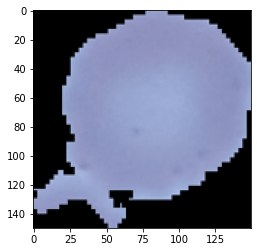

In [ ]:
n =random.randint(0,len(X_test)-1) 
img = X_test[n] 
plt.imshow(img) 
input_img = np.expand_dims(img,axis=0) 
print('« Label de cette image : »', label[image_number]) 
print('Prédiction de cette image :', model.predict(input_img)) 
print('Le label de cette image est :', model.predict(input_img)) 

In [ ]:
acc = model.evaluate(X_test, y_test) 
print('Accuracy=', (acc*100), '%') 

173/173 [==============================] - 14s 82ms/step - loss: 0.2108 - accuracy: 0.9367
Accuracy= [0.2107725739479065, 0.9366835951805115, 0.2107725739479065, 0.9366835951805115, 0.2107725739479065, 0.9366835951805115, 0.2107725739479065, 0.9366835951805115, 0.2107725739479065, 0.9366835951805115, 0.2107725739479065, 0.9366835951805115, 0.2107725739479065, 0.9366835951805115, 0.2107725739479065, 0.9366835951805115, 0.2107725739479065, 0.9366835951805115, 0.2107725739479065, 0.9366835951805115, 0.2107725739479065, 0.9366835951805115, 0.2107725739479065, 0.9366835951805115, 0.2107725739479065, 0.9366835951805115, 0.2107725739479065, 0.9366835951805115, 0.2107725739479065, 0.9366835951805115, 0.2107725739479065, 0.9366835951805115, 0.2107725739479065, 0.9366835951805115, 0.2107725739479065, 0.9366835951805115, 0.2107725739479065, 0.9366835951805115, 0.2107725739479065, 0.9366835951805115, 0.2107725739479065, 0.9366835951805115, 0.2107725739479065, 0.9366835951805115, 0.2107725739479065

la valeur d'accuracy est de 0.9366835951805115

#### 30 EPOCHS

In [ ]:
History = model.fit(X_train, y_train, batch_size=64, verbose = 1 ,epochs =30, validation_data =(X_test, y_test), shuffle = False) 

Epoch 1/30
345/345 [==============================] - 219s 631ms/step - loss: 0.1470 - accuracy: 0.9542 - val_loss: 0.1655 - val_accuracy: 0.9537
Epoch 2/30
345/345 [==============================] - 259s 750ms/step - loss: 0.1475 - accuracy: 0.9553 - val_loss: 0.1653 - val_accuracy: 0.9536
Epoch 3/30
345/345 [==============================] - 280s 810ms/step - loss: 0.1524 - accuracy: 0.9531 - val_loss: 0.1653 - val_accuracy: 0.9512
Epoch 4/30
345/345 [==============================] - 265s 768ms/step - loss: 0.1518 - accuracy: 0.9539 - val_loss: 0.1659 - val_accuracy: 0.9530
Epoch 5/30
345/345 [==============================] - 257s 745ms/step - loss: 0.1552 - accuracy: 0.9525 - val_loss: 0.2859 - val_accuracy: 0.9385
Epoch 6/30
345/345 [==============================] - 221s 641ms/step - loss: 0.1535 - accuracy: 0.9553 - val_loss: 0.1819 - val_accuracy: 0.9467
Epoch 7/30
345/345 [==============================] - 210s 609ms/step - loss: 0.1494 - accuracy: 0.9554 - val_loss: 0.1944 -

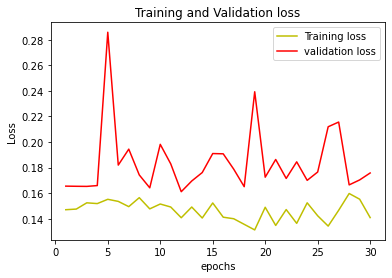

In [ ]:
loss = History.history['loss']
val_loss = History.history['val_loss'] 
epochs = range(1,len(loss)+1) 
plt.plot(epochs,loss,'y', label ='Training loss')
plt.plot(epochs,val_loss,'r', label ='validation loss') 
plt.title ('Training and Validation loss') 
plt.xlabel('epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()

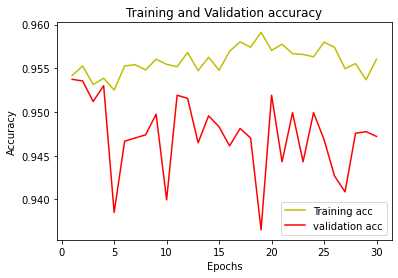

In [ ]:
acc = History.history['accuracy'] 
val_acc = History.history['val_accuracy'] 
plt.plot(epochs,acc,'y', label ='Training acc') 
plt.plot(epochs,val_acc,'r', label ='validation acc') 
plt.title ('Training and Validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.show() 

la performance du modèle à 30 epochs est mieux qu'à 20 épochs.
Ca veut dire que le modèle apprend encore mieux et peut améliorer ses performances.

« Label de cette image : » 0
Prédiction de cette image : [[1.]]
Le label de cette image est : [[1.]]


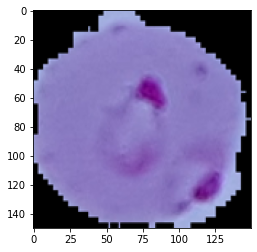

In [ ]:
n =random.randint(0,len(X_test)-1) 
img = X_test[n] 
plt.imshow(img) 
input_img = np.expand_dims(img,axis=0) 
print('« Label de cette image : »', label[image_number]) 
print('Prédiction de cette image :', model.predict(input_img)) 
print('Le label de cette image est :', model.predict(input_img)) 

In [ ]:
acc = model.evaluate(X_test, y_test) 
print('Accuracy=', (acc*100), '%') 

173/173 [==============================] - 9s 52ms/step - loss: 0.1758 - accuracy: 0.9472
Accuracy= [0.17576204240322113, 0.9472060799598694, 0.17576204240322113, 0.9472060799598694, 0.17576204240322113, 0.9472060799598694, 0.17576204240322113, 0.9472060799598694, 0.17576204240322113, 0.9472060799598694, 0.17576204240322113, 0.9472060799598694, 0.17576204240322113, 0.9472060799598694, 0.17576204240322113, 0.9472060799598694, 0.17576204240322113, 0.9472060799598694, 0.17576204240322113, 0.9472060799598694, 0.17576204240322113, 0.9472060799598694, 0.17576204240322113, 0.9472060799598694, 0.17576204240322113, 0.9472060799598694, 0.17576204240322113, 0.9472060799598694, 0.17576204240322113, 0.9472060799598694, 0.17576204240322113, 0.9472060799598694, 0.17576204240322113, 0.9472060799598694, 0.17576204240322113, 0.9472060799598694, 0.17576204240322113, 0.9472060799598694, 0.17576204240322113, 0.9472060799598694, 0.17576204240322113, 0.9472060799598694, 0.17576204240322113, 0.947206079959869

-- **la valeur d'accuracy est de 0.9366835951805115 à 20 epochs.**


-- **la valeur d'accuracy est de 0.9472060799598694 à 30 epochs.**

### Exercice 4 : Analyse de la matrice de confusion 
Il s’agit de comparer les labels prédits aux vrais labels.

In [ ]:
threshold = 0.5 
from sklearn.metrics import confusion_matrix 
import seaborn as sns 
y_pred = (model.predict(X_test)>=threshold).astype(int)

[[2755   54]
 [ 237 2466]]


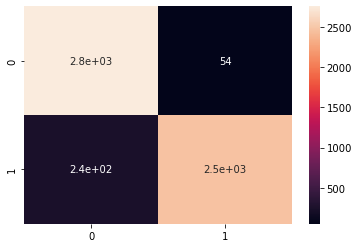

In [ ]:
cm = confusion_matrix(y_test,y_pred) 
sns.heatmap(cm,annot=True)
print(cm)

Selon la matrice de confusion, on constate que pour : 


-**Images Uninfected Label [0]: 2755 prédictions correctes et 54 prédictions fausses**


-**Images Parasitized Label [1]: 2466 prédictions correctes et 237 prédictions fausses**

On constate que le modèle est performant à ce stade mais il nécessite une amélioration.

In [ ]:
threshold = 0.3
from sklearn.metrics import confusion_matrix 
import seaborn as sns 
y_pred = (model.predict(X_test)>=threshold).astype(int)

[[2720   89]
 [ 192 2511]]


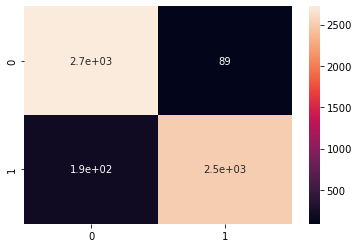

In [ ]:
cm = confusion_matrix(y_test,y_pred) 
sns.heatmap(cm,annot=True)
print(cm)


-**Images Uninfected Label [0]: 2720 prédictions correctes et 89 prédictions fausses**


-**Images Parasitized Label [1]: 2511 prédictions correctes et 192 prédictions fausses**

En diminuant la valeur de seuil, on constate que le nombre d'erreur pour les images Parasitized diminue.
Par contre, le nombre d'erreur pour les images Uninfected augmente;

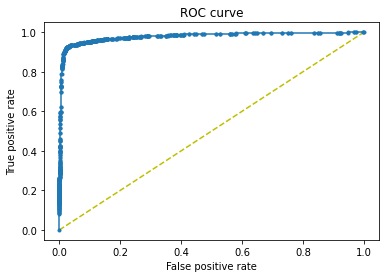

In [ ]:
from sklearn.metrics import roc_curve 
y_preds = model.predict(X_test).ravel() 
fpr, tpr, threshold = roc_curve(y_test, y_preds) 
plt.figure(1) 
plt.plot([0,1],[0,1],'y--') 
plt.plot(fpr,tpr,marker='.') 
plt.xlabel('False positive rate') 
plt.ylabel('True positive rate') 
plt.title('ROC curve') 
plt.show() 

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]
print("la valeur optimale du seuil est :", optimal_threshold)

la valeur optimale du seuil est : 0.3692044


La courbe ROC (fonctions d'efficacité du récepteur) est un outil important pour évaluer les performances d'un modèle de Machine Learning. 
Elle est le plus souvent utilisée pour des problèmes de classification binaire.
Plus la courbe ROC se situe dans la partie supérieure gauche, meilleur est le classificateur.
Par ce fait, on constate que notre courbe est située à gauche ce qui nous donne un bon classificateur.

Pour dégager le meilleur threshold, on doit toujours choisir des valeurs TPR qui sont proches de 1 et des valeurs de FPR qui sont proches de 0.
Dans notre cas, le seuil optimal est 0.3692044